# Importation des modules pythons

In [30]:
# traitement de données
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Numérique
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Categoriel
from sklearn.preprocessing import OneHotEncoder

# Données manquantes 
from sklearn.impute import SimpleImputer

# Text mining
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

# Comparaison metriques 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, make_scorer, average_precision_score, roc_auc_score 
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

# Classifiers

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import time

# Pipeline et sortie
from sklearn.pipeline import Pipeline
import pickle


In [11]:
#Lire Data score
credit_scoring = pd.read_csv('./credit_scoring.csv', sep=';' , header=0)#read csv file 
print(credit_scoring.shape)
X_score = credit_scoring.iloc[:, 0:13].values
labels_score = credit_scoring.iloc[:, 13].values


(4375, 14)


Ce jeu de donnée est composé de 4375 entrées chacune définie à travers 14 variable dont la 14eme variable est le status de l'individu que l'on cherchera à déterminer à travers des modèles

# Modèles d'apprentissage étudiés

Dans la suite de ce TP nous étudierons 3 modèles que sont l'arbre de décision CART, la méthode des plus proches voisins KNN et le multi-perceptron MLP. Nous chercherons à les comparés à travers divers transformations des données et nous garderons la meilleure méthode pour l'optimiser avant de la mettre dans un pickle 

array([[<AxesSubplot:title={'center':'Status'}>]], dtype=object)

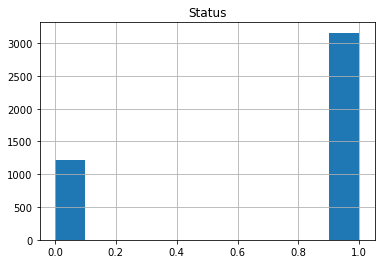

In [12]:
credit_scoring.hist('Status')

Nous observons qu'il y a presque le triple de status 1 que de 0

In [13]:
# Séparation du jeu de données en un jeu pour l'entrainement de l'algorithme et un pour le tester

X_train, X_test, labels_train, labels_test = train_test_split(X_score, labels_score, train_size = 0.5, random_state =1)

## Separation du jeu de données

le jeu de données est séparé en 2 sous jeux de tailles égales un jeu avec ses labels pour entrainer notre modèle et un autre avec ses labels pour le tester.

In [14]:
X_test.shape

(2188, 13)

In [15]:
def comparaison_méthode(X_train, X_test, labels_train, labels_test):

    # arbre de décision CART 
    decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    decision_tree.fit(X_train, labels_train)
    y_pred = decision_tree.predict(X_test)

    print("Arbre de décision")
    print(confusion_matrix(labels_test, y_pred))
    print('Accuracy : {0:.2f}%, Précision : {1:.2f}%'.format(100*accuracy_score(labels_test,y_pred),100*precision_score(labels_test,y_pred))) 
          
    # KNN
            
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, labels_train)
    k_pred =  neigh.predict(X_test)

    print("KNN")
    print(confusion_matrix(labels_test, k_pred))
    print('Accuracy : {0:.2f}%, Précision : {1:.2f}%'.format(100*accuracy_score(labels_test,k_pred),100*precision_score(labels_test,k_pred))) 
          
    # Multi perceptron


    print("Multi Perceptron")
    clf = MLPClassifier(random_state=1, hidden_layer_sizes = (40,20)).fit(X_train, labels_train)
    clf_pred = clf.predict(X_test)


    print(confusion_matrix(labels_test, clf_pred))
    print('Accuracy : {0:.2f}%, Précision : {1:.2f}%'.format(100*accuracy_score(labels_test,clf_pred),100*precision_score(labels_test,clf_pred))) 

comparaison_méthode(X_train,  X_test, labels_train, labels_test)


Arbre de décision
[[ 325  279]
 [ 318 1266]]
Accuracy : 72.71%, Précision : 81.94%
KNN
[[ 189  415]
 [ 187 1397]]
Accuracy : 72.49%, Précision : 77.10%
Multi Perceptron
[[ 370  234]
 [ 456 1128]]
Accuracy : 68.46%, Précision : 82.82%


# Comparaison des méthode sur données de base

## Indicateurs etudiés
Dans le cas étudiés les deux valeurs les plus intéressantes sont **l'accuracy** qui indique globalement la capacité de la méthode à trouver des résultats juste et **la précision** qui, dans notre cas, est l'indicateur du gain/perte effectif. 

## Résultats

| Méthode/métriques  | Accuracy | Précision |
| :------------------|:-----------:|:-------------:|
| CART |   **72.71**   |  81.94   |  
| KNN  |   72.49   |  77.10   |     
| MLP  |   68.46   |  **82.82**   |   
     


Nous observons que sans traitement des données nous voyons qu'il n'y a pas de réelle meilleure méthode car l'arbre de décision a le meilleure taux accuracy + Précision mais c'est l'arbre de décision (72.71%) qui a la meilleure accuracy et le MLP qui la meilleure précision(82.82%). 

Il est donc intéressant de retravailler les données pour voir s'il est possible d'améliorer la qualité des méthodes. Une des méthode est la normalisation des données qui devrait améliorer le KNN et le MLP ceux-ci mettant en compétition les variables.

In [16]:
# Normalisation des données

MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train)
X_norm_MM_train = MM_scaler.transform(X_train)
X_norm_MM_test = MM_scaler.transform(X_test)

Standard_scaler = StandardScaler()
Standard_scaler.fit(X_train)
X_norm_Stand_train = Standard_scaler.transform(X_train)
X_norm_Stand_test = Standard_scaler.transform(X_test)


In [17]:
# Comparaison des méthodes en utilisant les données normées par la méthode MinMaxScaler

comparaison_méthode(X_norm_MM_train, X_norm_MM_test, labels_train, labels_test)

Arbre de décision
[[ 325  279]
 [ 315 1269]]
Accuracy : 72.85%, Précision : 81.98%
KNN
[[ 283  321]
 [ 236 1348]]
Accuracy : 74.54%, Précision : 80.77%
Multi Perceptron
[[ 321  283]
 [ 179 1405]]
Accuracy : 78.88%, Précision : 83.23%


In [18]:
# Comparaison des méthodes en utilisant les données normées par la méthode StandardScaler

comparaison_méthode(X_norm_Stand_train, X_norm_Stand_test, labels_train, labels_test)

Arbre de décision
[[ 322  282]
 [ 315 1269]]
Accuracy : 72.71%, Précision : 81.82%
KNN
[[ 286  318]
 [ 223 1361]]
Accuracy : 75.27%, Précision : 81.06%
Multi Perceptron
[[ 342  262]
 [ 227 1357]]
Accuracy : 77.65%, Précision : 83.82%


# Différence entre MinMax et Standard Scaler

Comme nous pouvons l'observer ci dessus qu'il existe une légère différence en faveur du Standard Scaling.

## MinMax Scaler

| Méthode/métriques  | Accuracy | Précision |
| :------------------|:-----------:|:-------------:|
| CART |   72.85   |  81.98   |  
| KNN  |   74.54   |  80.77   |     
| MLP  |   **78.88**   |  **83.23**   |   
     

## Standard Scaler

| Méthode/métriques  | Accuracy | Précision |
| :------------------|:-----------:|:-------------:| 
| CART |   72.71   |  81.82   |
| KNN  |   75.27   |  81.06   |     
| MLP  |   **77.65**   |  **83.82**   |   
       


# Normalisation

L'arbre de décision n'a pas eu de vrais amélioration car dans sa méthode elle ne met pas en concurrence les variables contrairement à KNN et MLP qui eux ont vu leur accuracy et leur précision augmenter. 

Nous observons que la méthode MLP est la meilleure dans le cas de données normalisées avec la meilleure accuracy et la meilleure précision. MinMax est meilleurs pour l'accuracy (78.88) et Standard Scaler pour la précision(83.82).


In [19]:
pca = PCA(n_components = 13)
pca.fit(X_norm_Stand_train)
X_pca_train = pca.transform(X_norm_Stand_train)
X_pca_test = pca.transform(X_norm_Stand_test)
print(X_pca_train.shape)
print("Ratio Axes")
print(pca.explained_variance_ratio_)

X_norm_pca_train = np.concatenate((X_pca_train, X_pca_train[: , 0:3]) ,axis=1)
X_norm_pca_test = np.concatenate((X_pca_test, X_pca_test[: , 0:3]) ,axis=1)


(2187, 13)
Ratio Axes
[0.18820572 0.14667046 0.10648009 0.09160743 0.08650315 0.07784526
 0.07262329 0.05562868 0.05013463 0.04703507 0.03433251 0.02936075
 0.01357296]


In [20]:
comparaison_méthode(X_norm_pca_train, X_norm_pca_test, labels_train, labels_test)

Arbre de décision
[[ 307  297]
 [ 324 1260]]
Accuracy : 71.62%, Précision : 80.92%
KNN
[[ 283  321]
 [ 212 1372]]
Accuracy : 75.64%, Précision : 81.04%
Multi Perceptron
[[ 326  278]
 [ 235 1349]]
Accuracy : 76.55%, Précision : 82.91%


# Effet de l'ACP

Nosu voyons que l'utilisation des données de l'ACP est globalement un echec. Aucune des méthode a vu ses critères de qualité s'améliorer, il y a même une légère regression visible, principalement pour l'arbre de décision qui ici, contraitement à la normalisation est affecté par la transformation de l'espace réalisée par la PCA.

| Méthode/métriques  | Accuracy | Précision |
| :------------------|:-----------:|:-------------:|   
| CART  |   71.62   |  80.92   |     
| KNN   |   75.64   |  81.04   |   
| MLP   |   **76.55**   |  **82.91**   |       


## Comparaison finale

De toutes les méthodes étudiées nous remarquons que la meilleure est la **MLP** sur des données normalisées par la méthode **MinMax Scaler** avec une accuracy de 83.23% et une précision de 78.88%. Aussi pour la suite de l'exercice cette méthode sur ces données sera utilisée car j'ai décidé de séparé les deux normalisation sur la précision plutot que sur l'accuracy car nous supposons qu'il y a une perte importante dans le fait de refuser un VP.

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


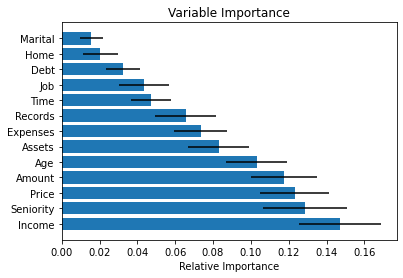

In [21]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_norm_MM_train, labels_train)
importances=clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features=credit_scoring.columns[:13]
print(features[sorted_idx])

padding = np.arange(X_norm_MM_train.size/len(X_norm_MM_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

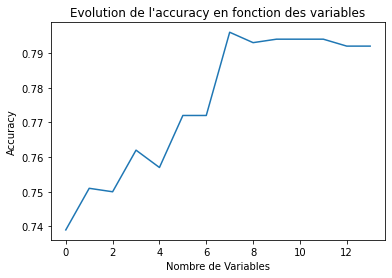

In [22]:
MLP=MLPClassifier(random_state=1, hidden_layer_sizes = (40,20))
scores=np.zeros(X_norm_MM_train.shape[1]+1)
for f in np.arange(0, X_norm_MM_train.shape[1]+1):
    X1_f = X_norm_MM_train[:,sorted_idx[:f+1]]
    X2_f = X_norm_MM_test[:,sorted_idx[:f+1]]
    MLP.fit(X1_f,labels_train)
    YMLP=MLP.predict(X2_f)
    scores[f]=np.round(accuracy_score(labels_test,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

# Réduction de l'espace d'apprentissage

Un risque avec l'apprentissage automatique c'est que nous sur-entrainons notre méthode. En effet, en lui donnant des métriques de faible qualité d'apprentissage nous risquons d'augmenter le bruit et donc de diminuer la qualité de notre méthode. C'est pourquoi il est important d'étudier les métriques utilisées pour ne garder que celles apportant de l'information.
## Résultats

Comme nous l'obervons dans le plot ci dessus il y a une chute puis stagnation de l'information à partir de la 7eme variables/métrique ce qui indique que celles après ont un risque d'apporté du bruit. Aussi nous garderons les 7 premières variables pour la suite. (Income, Seniority, Price, Amount, Age, Assets, Expenses)


In [29]:


listparam = [(10,10),(20,10),(20,20),(30,20),(40,20),(50,20),(30,30),(40,30),(50,30)]


solver_p = ['adam']
activation_p = ['identity', 'tanh']
#MLPClassifier(hidden_layer_sizes=(40,20),random_state=1)

param_grid=dict(hidden_layer_sizes=listparam, activation=activation_p,solver=solver_p)
grid = GridSearchCV(MLPClassifier(), param_grid,cv=3, scoring='accuracy')
grid.fit(X_norm_MM_train[: ,sorted_idx[:8]],labels_train)



print(grid.best_params_)
print(grid.best_score_)

#le gridsearch nous donne les meileurs paramètres
#si le score est plus petit que le meileurs scores de variable => refaire dans l'autre ordre
#le grid puis la courbe

{'activation': 'tanh', 'hidden_layer_sizes': (30, 20), 'solver': 'adam'}
0.7828074988568815


# Recherche des meilleurs paramètres

Une fois l'espace des métriques réduit il faut chercher à optimiser notre classifieur à ce qu'il soit le plus optimisé possible pour notre jeu de donnée. 

## Résultats

Nous observons que les meilleurs paramètres, dans ceux étudiés, sont :
- activation = tanh 
- hidden_layer_sizes  = (30, 20)
- solver = adam
pour une accuracy de 78,28%

Ils seront utilisés dans la dernière étape de prédiction du jeu de données final.

In [30]:
#Pipeline



# Création et pickling du meilleur pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('classifier', MLPClassifier(activation= 'tanh', hidden_layer_sizes= (50, 20), solver = 'adam')) ])
pipe.fit(X_train[: ,sorted_idx[:8]], labels_train)
pickle.dump(pipe, open("pipeline.pkl", "wb"))


# Load et utilisation du meilleurs pipeline depuis un pickle
P1=pickle.load(open( "pipeline.pkl", "rb" ) ) 
P1.score(X_test[: ,sorted_idx[:8]], labels_test)
#P1.predict_proba(X_test[: ,sorted_idx[:8]])  #-> mis sous commentaire pour éviter de prendre trop de place

0.7957038391224863

## Creation d'un pipeline

Nous créons un pipeline réalisant les étapes précédentes donnant le meilleur score, ici une **normalisation** par **MinMax Scaler** et le meilleurs classifieur optimisé, **MLPClassifier** sur les **variables** apportant de l'informations (**7**). 

Ici nous avons entrainé non pas sur l'entièreté du jeu de donnée mais uniquement sur la moitière entrainement car nous voulons tester l'appel du pickle.

## Pickling

Le pickling est un moyen de sauvegarder notre modèle optimisé et entrainé de façon à ce que celui-ci puisse être réutilisé par les autres.

# Comparaison des classifieurs

In [15]:
# Dictionnaire des classifieurs à comparer 

clfs = {
'RF': RandomForestClassifier(n_estimators=50, random_state=1),
'KNN': KNeighborsClassifier(n_neighbors=10),
'BAG' : BaggingClassifier(n_estimators = 50, random_state =1),
'ADA': AdaBoostClassifier(n_estimators = 50, random_state =1),
'MLP': MLPClassifier(hidden_layer_sizes= (50,20), alpha = 0.001, max_iter = 100, random_state =1),
'NB': GaussianNB(),
'CART': DecisionTreeClassifier(criterion='gini', random_state =1),
'ID3': DecisionTreeClassifier(criterion='entropy', random_state =1)


}

In [13]:
# Fonction de comparaison

## Comparaison KFold

def run_classifiers(X, labels, modeles):
    """
    Run l'ensemble des classifiers contenus dans modeles, les compare et les trie suivant leur accuracy
    arguments: 
        X(np array): jeu de données contenant uniquement les métriques
        labels(np array): status du jeu de données
        modeles(dic): ensemble des classifieurs à comparer
    retourne: liste_classee liste de tuple (classifieur, accuracy) classé par accuracy
        
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    liste_classee = []
    for mod in modeles:
        begin = time.time()
        modele = modeles[mod]
        cv_acc = cross_val_score(modele, X, labels, cv = kf)
        end = time.time()
        cv_precision = cross_val_score(modele, X, labels, cv = kf, scoring = 'precision')
        cv_auc = cross_val_score(modele, X, labels, cv = kf, scoring = 'roc_auc')
        print("Accuracy for {} is : {} +/- {} (in {} seconds)".format(mod,np.mean(cv_acc), np.std(cv_acc), end - begin))
        print("Precision for {} is : {} +/- {} ".format(mod,np.mean(cv_precision),np.std(cv_precision) ))
        print("AUC for {} is : {} +/- {} ".format(mod,np.mean(cv_auc),np.std(cv_auc) ))
        print()
        liste_classee.append((mod ,np.mean(cv_acc), np.mean(cv_precision),  np.mean(cv_auc)))
    liste_classee.sort(key=lambda tup: tup[1], reverse= True)
    return liste_classee

## Comparaison toutes transformations de données

def run_classifiers_all_forms(X, labels, modeles):
    """
    Traite les données et les fait tourner sur l'ensemble des classifieurs. 
    arguments: 
        X(np array): jeu de données contenant uniquement les métriques
        labels(np array): status du jeu de données
        modeles(dic): ensemble des classifieurs à comparer
    print: les meilleurs tuples (modele,accuracy) de change traitement de données
        
    """
    # non traité
    print("Non traité")
    print()
    base_list = run_classifiers(X, labels, clfs)
    
    # MM Scaler 
    print("MinMax Scaler")
    print()
    MM_scaler = MinMaxScaler()
    MM_scaler.fit(X)
    X_norm_MM = MM_scaler.transform(X)
    MM_list = run_classifiers(X_norm_MM, labels, modeles)
    

    # Standard Scaler
    print("Standard Scaler")
    print()
    Standard_scaler = StandardScaler()
    Standard_scaler.fit(X)
    X_norm_Stand = Standard_scaler.transform(X)
    SS_list = run_classifiers(X_norm_Stand, labels, modeles)


    # PCA 
    print("PCA ")
    print()
    nb_variable = X.shape[1]
    pca = PCA(n_components = nb_variable)
    pca.fit(X_norm_Stand)
    X_pca = pca.transform(X_norm_Stand)
    PCA_list = run_classifiers(X_pca, labels, modeles)
    
    # Choisir le meilleur Classifieur 
    print("meilleure accu base {} pour modele {}".format(base_list[0][1], base_list[0][0]))
    print("meilleure accu MM_norm {} pour modele {}".format(MM_list[0][1], MM_list[0][0]))
    print("meilleure accu SS_norm {} pour modele {}".format(SS_list[0][1], SS_list[0][0]))
    print("meilleure accu PCA {} pour modele {}".format(PCA_list[0][1], PCA_list[0][0]))

In [31]:
run_classifiers(X_score, labels_score, clfs)
#run_classifiers_all_forms(X_score, labels_score, clfs)

Accuracy for RF is : 0.782168793036791 +/- 0.014082908490633874 (in 3.177326202392578 seconds)
Precision for RF is : 0.8188314991509135 +/- 0.01644054245364466 
AUC for RF is : 0.8227977893623594 +/- 0.014984679229289265 

Accuracy for KNN is : 0.7316520903210976 +/- 0.0162445921564875 (in 0.41539692878723145 seconds)
Precision for KNN is : 0.7784542405455939 +/- 0.019619741554011725 
AUC for KNN is : 0.6800494709554186 +/- 0.03719472715010339 

Accuracy for BAG is : 0.7780534570494132 +/- 0.014695277468516874 (in 8.108959197998047 seconds)
Precision for BAG is : 0.8258052136368619 +/- 0.015684804061311893 
AUC for BAG is : 0.8192406871243607 +/- 0.020764288429370146 

Accuracy for ADA is : 0.7881100905927714 +/- 0.01559007999928624 (in 2.2397310733795166 seconds)
Precision for ADA is : 0.8225146443155646 +/- 0.017517793559012357 
AUC for ADA is : 0.8292753456515276 +/- 0.021239681651922047 

Accuracy for MLP is : 0.7035479556544726 +/- 0.06009415563645869 (in 9.54650068283081 seconds)

[('ADA', 0.7881100905927714, 0.8225146443155646, 0.8292753456515276),
 ('RF', 0.782168793036791, 0.8188314991509135, 0.8227977893623594),
 ('BAG', 0.7780534570494132, 0.8258052136368619, 0.8192406871243607),
 ('NB', 0.7721090247954611, 0.8281113199892467, 0.7909159731061196),
 ('KNN', 0.7316520903210976, 0.7784542405455939, 0.6800494709554186),
 ('CART', 0.7268617493704481, 0.8077865012769232, 0.6555714057861003),
 ('ID3', 0.723427687742286, 0.8140380379602308, 0.6635419494379315),
 ('MLP', 0.7035479556544726, 0.8019041580862674, 0.7002782747071147)]

## Résultats

Nous utilisons différentes métriques pour nos classifieurs et ainsi juger au mieux lequel choisir. Nous obtenons les résultats ci dessous :

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.7821   |  0.8188   |  0.8227    | 
| KNN  |   0.7316   |  0.7784   |  0.6800    |  
| BAG  |   0.7780   |  0.8258   |  0.8192    |  
| ADA  |   **0.7881**   |  0.8225   |  **0.8292**    |  
| MLP  |   0.7035   |  0.8019   |  0.7002    |  
| NB   |   0.7721   |  **0.8281**   |  0.7909    |  
| CART |   0.7268   |  0.8077   |  0.6555    |  
| ID3  |   0.7234   |  0.8140   |  0.6635    |  


Nous observons qu'un des classifieur semble sortir du lot : **ADA**. En effet, il possède la meilleure accuracy 78,81 % et la meilleure aire sous la courbe 82.92%. Aussi même s'il n'a pas la meilleure prédiction la différence entre NB et ADA sur ce point est extrêmement faible (82.25% contre 82.81%) . 

Ainsi pour ce jeu de données nous pouvons dire que le classifieur **ADA** est le meilleur.

# Variables categorielles et données manquantes 

In [8]:
# Partie 2

#Lire Data crédit
credit = pd.read_csv('./credit.data', sep='\t' , header=None)#read csv file

print(credit.shape)
liste = [1,2,7, 10,13,14]
credit.replace('?', np.nan, inplace=True)
credit = credit.dropna()
X = credit.iloc[:,0:15].values
X_credit = credit.iloc[:, liste].values
X_credit = X_credit.astype(float)

print(X_credit.shape)

labels_credit = credit.iloc[:, 15].values
labels_credit = np.where(labels_credit == '+', int(1), labels_credit)
labels_credit = np.where(labels_credit == '-', int(0), labels_credit)
print(labels_credit.shape)

(688, 16)
(653, 6)
(653,)


In [9]:
labels_credit = labels_credit.astype(int)
print(labels_credit)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 296.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

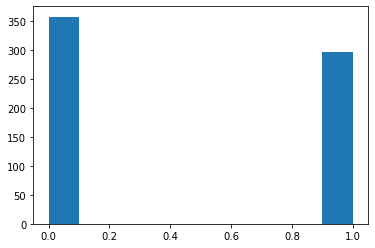

In [34]:
plt.hist(labels_credit)

Nous observons qu'il y a légèrement plus de résultats ayant un status = 0  que de résultats ayant un status = 1.

In [179]:
run_classifiers(X_credit, labels_credit, clfs)

Accuracy for RF is : 0.7733100233100233 +/- 0.056745354078952585 (in 1.4579503536224365 seconds)
Precision for RF is : 0.7783054649884945 +/- 0.05798089750066544 
AUC for RF is : 0.8444583500324899 +/- 0.03958364530635138 

Accuracy for KNN is : 0.6843589743589744 +/- 0.04966145076549635 (in 0.06927704811096191 seconds)
Precision for KNN is : 0.7224761186525892 +/- 0.05098526023119083 
AUC for KNN is : 0.7265834084631388 +/- 0.05687130951418025 

Accuracy for BAG is : 0.7731235431235431 +/- 0.06131662087388974 (in 2.0041894912719727 seconds)
Precision for BAG is : 0.7858008151269021 +/- 0.0692249675219225 
AUC for BAG is : 0.8218669809316015 +/- 0.05253884645387411 

Accuracy for ADA is : 0.7855477855477855 +/- 0.052486698677572795 (in 1.3697514533996582 seconds)
Precision for ADA is : 0.7955212425939676 +/- 0.06760820188441759 
AUC for ADA is : 0.8398415175502076 +/- 0.047823950402166006 

Accuracy for MLP is : 0.7042657342657342 +/- 0.05665496729833608 (in 2.447516679763794 seconds)


[('ADA', 0.7855477855477855, 0.7955212425939676, 0.8398415175502076),
 ('RF', 0.7733100233100233, 0.7783054649884945, 0.8444583500324899),
 ('BAG', 0.7731235431235431, 0.7858008151269021, 0.8218669809316015),
 ('CART', 0.7364568764568764, 0.7235839749096266, 0.7328208790243436),
 ('NB', 0.715034965034965, 0.8282522554172171, 0.7977623185135061),
 ('MLP', 0.7042657342657342, 0.6992806428298861, 0.7724610592383917),
 ('ID3', 0.7027972027972028, 0.672351085855541, 0.6992780999914796),
 ('KNN', 0.6843589743589744, 0.7224761186525892, 0.7265834084631388)]

## Résultats comparaison

Nous utilisons différentes métriques pour nos classifieurs et ainsi juger au mieux lequel choisir. Nous obtenons les résultats ci dessous :

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.7733   |  0.7783   |  **0.8444**    | 
| KNN  |   0.6843   |  0.7224   |  0.7265    |  
| BAG  |   0.7731   |  0.7858   |  0.8218    |  
| ADA  |   **0.7855**   |  0.7955   |  0.8398    |  
| MLP  |   0.7042   |  0.6992   |  0.7724    |  
| NB   |   0.7150   |  **0.8282**   |  0.7977    |  
| CART |   0.7364   |  0.7235   |  0.7328    |  
| ID3  |   0.7027   |  0.6723   |  0.6992    |  

Ici, il est difficile de déterminer quelle est réellement la meilleure méthode car chaque métrique de qualité ne donne pas le même classifieur en meilleurs. Ainsi, ADA est le meilleurs sur l'accuracy avec 78,55% , NB est le meilleurs pour la précision avec 82.82%  et le meilleurs en air sous la courbe est RF avec 84.44%. C'est pourquoi nous allons procéder à une étape de normalisation pour voir s'il y a une amélioration des résultats et qu'un des classifieurs sort du lot.



In [10]:
    # MM Scaler 
    print("MinMax Scaler")
    print()
    MM_scaler = MinMaxScaler()
    MM_scaler.fit(X_credit)
    X_norm_MM = MM_scaler.transform(X_credit)
    MM_list = run_classifiers(X_norm_MM, labels_credit, clfs)
    

    # Standard Scaler
    print("Standard Scaler")
    print()
    Standard_scaler = StandardScaler()
    Standard_scaler.fit(X_credit)
    X_norm_Stand = Standard_scaler.transform(X_credit)
    SS_list = run_classifiers(X_norm_Stand, labels_credit, clfs)


MinMax Scaler

Accuracy for RF is : 0.7733100233100233 +/- 0.056326707088548957 (in 1.1105718612670898 seconds)
Precision for RF is : 0.7786412403242698 +/- 0.05678156616264215 
AUC for RF is : 0.8443834220062533 +/- 0.03897003477999062 

Accuracy for KNN is : 0.7288578088578088 +/- 0.06749206224192571 (in 0.0793306827545166 seconds)
Precision for KNN is : 0.8308641199701571 +/- 0.09524597082767546 
AUC for KNN is : 0.8036718478146421 +/- 0.03821822719335076 

Accuracy for BAG is : 0.7731235431235431 +/- 0.06131662087388974 (in 1.7188427448272705 seconds)
Precision for BAG is : 0.7858008151269021 +/- 0.0692249675219225 
AUC for BAG is : 0.8226999238523625 +/- 0.05155896470147043 

Accuracy for ADA is : 0.7855477855477855 +/- 0.052486698677572795 (in 1.067209005355835 seconds)
Precision for ADA is : 0.7955212425939676 +/- 0.06760820188441759 
AUC for ADA is : 0.8407960878840883 +/- 0.04678674537181819 

Accuracy for MLP is : 0.761025641025641 +/- 0.052214119213057325 (in 3.1158370971679

## Résultat comparaison métriques normalisées

Les résultats de la comparaison des classifieurs après normalisation sont :

### MinMax Scaler

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.7733   |  0.7786   |  **0.8443**    | 
| KNN  |   0.7288   |  **0.8308**   |  0.8036    |  
| BAG  |   0.7731   |  0.7858   |  0.8226    |  
| ADA  |   **0.7855**   |  0.7955   |  0.8407    |  
| MLP  |   0.7610   |  0.8145   |  0.8186    |  
| NB   |   0.7150   |  0.8282   |  0.7978    |  
| CART |   0.7379   |  0.7260   |  0.7341    |  
| ID3  |   0.7027   |  0.6733   |  0.6992    |  


### Standard Scaler
| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.7717   |  0.7754   |  **0.8451**    | 
| KNN  |   0.7272   |  0.8218   |  0.8089    |  
| BAG  |   0.7731   |  0.7858   |  0.8231    |  
| ADA  |   **0.7855**   |  0.7955   |  0.8398    |  
| MLP  |   0.7838   |  0.8131   |  0.8423    |  
| NB   |   0.7150   |  **0.8282**   |  0.7978    |  
| CART |   0.7395   |  0.7280   |  0.7355    |  
| ID3  |   0.7043   |  0.6751   |  0.7005    |  

Nous observons qu'ici il n'y a pas vraiment de meilleure normalisation, en effet si plusieurs classifieurs ont vue leur précision, accuracy et AUC changer les meilleurs de chéque sont presque égaux. Nous voyons donc que ADA a la meilleure accuracy dans les deux et qui est exactement la même 78.55%. MinMax scaler la meilleure pour la précision 83.03% avec KNN  contre 82.82% avec NB pour standard scaler. Finalement, RF a la meilleure AUC dans les deux cas mais est légèrement meilleur pour une normalisation par Standard scaler avec 84.51%. 

Ici, il n'est pas possible de sortir de meilleur classifieur et il faudra le choisir par rapport à quelle métrique on cherche à maximiser.


In [35]:
#Pour les variables catégorielles
col_cat = [0,3,4,5,6,8,9,11,12]
X_cat = np.copy(X[:, col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
    
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent') # remplir les valeures manquantes 
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

#Pour les variables numériques
X_num = np.copy(X[:, liste])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean') # remplir les valeures manquantes 
X_num = imp_num.fit_transform(X_num)


"X_new_num[X_new_num == '?'] = np.nan X_new_num = X_new_num.astype(float)\nX_num = X[:, col_num] X_num[X_num == '?'] = np.nan X_num = X_num.astype(float) Y_num = Y[~np.isnan(X_num).any(axis=1)] X_num = X_num[~np.isnan(X_num).any(axis=1)]\n"

In [36]:
# transformation des variable catégoriel en une matrice binaire de m modalités 

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

[[1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

In [196]:
run_classifiers(X_cat_bin, labels_credit, clfs)

Accuracy for RF is : 0.8667832167832168 +/- 0.040033463597012355 (in 1.1319260597229004 seconds)
Precision for RF is : 0.8446673881673881 +/- 0.030611502239651374 
AUC for RF is : 0.9155678126528487 +/- 0.044926508975838844 

Accuracy for KNN is : 0.8713519813519813 +/- 0.023027530669368516 (in 0.12408900260925293 seconds)
Precision for KNN is : 0.8462440916889896 +/- 0.034481267161532596 
AUC for KNN is : 0.9120954335666447 +/- 0.04473908758921921 

Accuracy for BAG is : 0.8636829836829838 +/- 0.04095297123982129 (in 1.613996982574463 seconds)
Precision for BAG is : 0.845923101540037 +/- 0.023284516606924995 
AUC for BAG is : 0.9127497771453399 +/- 0.046692944677885095 

Accuracy for ADA is : 0.8574825174825174 +/- 0.037374218755734004 (in 1.3069312572479248 seconds)
Precision for ADA is : 0.8023425528202077 +/- 0.04640699520021005 
AUC for ADA is : 0.8964340287758856 +/- 0.061812739447652226 

Accuracy for MLP is : 0.8698135198135197 +/- 0.04201423975415263 (in 6.173632860183716 seco

[('KNN', 0.8713519813519813, 0.8462440916889896, 0.9120954335666447),
 ('MLP', 0.8698135198135197, 0.841835561316357, 0.9177434883494566),
 ('RF', 0.8667832167832168, 0.8446673881673881, 0.9155678126528487),
 ('BAG', 0.8636829836829838, 0.845923101540037, 0.9127497771453399),
 ('CART', 0.8591142191142189, 0.8552282186976292, 0.8775844904797498),
 ('ID3', 0.859090909090909, 0.8585282503513871, 0.8752441748822936),
 ('ADA', 0.8574825174825174, 0.8023425528202077, 0.8964340287758856),
 ('NB', 0.6571328671328672, 0.8852777777777778, 0.8591055084704854)]

## Résultats variables categorielles complètes

Nous allons comparer nos classifieurs sur nos variables catégorielles complétées et transformées: 

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.8667   |  0.8446   |  0.9155    | 
| KNN  |   **0.8713**   |  0.8462   |  0.9120    |  
| BAG  |   0.8636   |  0.8459   |  0.9127    |  
| ADA  |   0.8574   |  0.8023   |  0.8964    |  
| MLP  |   0.8698   |  0.8418   |  **0.9177**    |  
| NB   |   0.6571   |  **0.8852**   |  0.8591    |  
| CART |   0.8591   |  0.8552   |  0.8775    |  
| ID3  |   0.8590   |  0.8585   |  0.8752    |  


Nous obtenons des résultats globalement bons sur toutes les métriques. Nous ne pouvons déterminer réellement de meilleurs classifieurs chacune des métriques ayant un classifieur différent comme meilleurs : 
- accuracy : KNN, 87.13%
- Précision : NB, 88.52%
- AUC : MLP, 91.77% 

Aussi nous allons tenter d'obtenir plus d'informations en concatenant nos métriques numériques et catégorielles et peut être obtenir un classifieur meilleur que les autres.

In [41]:
# MM Scaler 
print("MinMax Scaler")
print()
MM_scaler = MinMaxScaler()
MM_scaler.fit(X_num)
X_norm_MM = MM_scaler.transform(X_num)

    

# Standard Scaler
print("Standard Scaler")
print()
Standard_scaler = StandardScaler()
Standard_scaler.fit(X_num)
X_norm_Stand = Standard_scaler.transform(X_num)



X_cat_bin = X_cat_bin.astype(float)
X_total_SS = np.concatenate((X_norm_Stand, X_cat_bin), axis = 1)
X_total_MM = np.concatenate((X_norm_MM, X_cat_bin), axis = 1)

MinMax Scaler

Standard Scaler



In [42]:
run_classifiers(X_total_MM, labels_credit, clfs)

Accuracy for RF is : 0.8866899766899767 +/- 0.04569578563137373 (in 1.088683843612671 seconds)
Precision for RF is : 0.8729342075240296 +/- 0.05294842942348573 
AUC for RF is : 0.9314046672899197 +/- 0.04193023238321989 

Accuracy for KNN is : 0.8667132867132865 +/- 0.041412773986821784 (in 0.11176443099975586 seconds)
Precision for KNN is : 0.8719801722282741 +/- 0.04295483511203695 
AUC for KNN is : 0.9171155949017992 +/- 0.04749658913743869 

Accuracy for BAG is : 0.8757808857808858 +/- 0.057979525685265265 (in 1.9541385173797607 seconds)
Precision for BAG is : 0.8620999357003004 +/- 0.07862812340609228 
AUC for BAG is : 0.9322155054828418 +/- 0.04162039750295771 

Accuracy for ADA is : 0.8543822843822844 +/- 0.0545113803876797 (in 1.1007816791534424 seconds)
Precision for ADA is : 0.8343164478272932 +/- 0.05885335719726918 
AUC for ADA is : 0.9101320956573247 +/- 0.054358449758487984 

Accuracy for MLP is : 0.8728205128205128 +/- 0.03791935428624572 (in 4.903496265411377 seconds)
P

[('RF', 0.8866899766899767, 0.8729342075240296, 0.9314046672899197),
 ('BAG', 0.8757808857808858, 0.8620999357003004, 0.9322155054828418),
 ('MLP', 0.8728205128205128, 0.8513339695267328, 0.9227037198679466),
 ('KNN', 0.8667132867132865, 0.8719801722282741, 0.9171155949017992),
 ('ADA', 0.8543822843822844, 0.8343164478272932, 0.9101320956573247),
 ('ID3', 0.8237062937062938, 0.8085705907076874, 0.8237241092396147),
 ('CART', 0.8099300699300699, 0.8094313695563697, 0.807299538872239),
 ('NB', 0.7336596736596736, 0.9115201465201466, 0.8791635867477255)]

## Résultats metriques numeriques MinMax Scaler + Categorielles 

Nous allons maintenant oberserver l'évolution de nos résultats en utilisant les données numériques normalisées par MinMax Scaler: 

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   **0.8866**   |  0.8729   |  0.9314    | 
| KNN  |   0.8667   |  0.8719   |  0.9171    |  
| BAG  |   0.8543   |  0.8620   |  **0.9322**    |  
| ADA  |   0.8543   |  0.8343   |  0.9101    |  
| MLP  |   0.8728   |  0.8513   |  0.9227    |  
| NB   |   0.7336   |  **0.9115**   |  0.8791    |  
| CART |   0.8099   |  0.8094   |  0.8072    |  
| ID3  |   0.8237   |  0.8085   |  0.8237    | 

Comme précédemment nous n'arrivons pas à trouver de classifieur meilleur que les autres avec chaque métrique ayant un classifieur comme meilleur différent.


In [43]:
run_classifiers(X_norm_Stand, labels_credit, clfs)

Accuracy for RF is : 0.7717715617715617 +/- 0.05620688551675587 (in 1.0467376708984375 seconds)
Precision for RF is : 0.7754729526732236 +/- 0.05647742158597195 
AUC for RF is : 0.8451296856672904 +/- 0.0396381277537526 

Accuracy for KNN is : 0.7272027972027971 +/- 0.061412604400076426 (in 0.05717635154724121 seconds)
Precision for KNN is : 0.821843984962406 +/- 0.08251561823898615 
AUC for KNN is : 0.8089419009738321 +/- 0.046960428060623435 

Accuracy for BAG is : 0.7731235431235431 +/- 0.06131662087388974 (in 1.4782965183258057 seconds)
Precision for BAG is : 0.7858008151269021 +/- 0.0692249675219225 
AUC for BAG is : 0.823173415234249 +/- 0.05164746408081859 

Accuracy for ADA is : 0.7855477855477855 +/- 0.052486698677572795 (in 0.9809575080871582 seconds)
Precision for ADA is : 0.7955212425939676 +/- 0.06760820188441759 
AUC for ADA is : 0.8398415175502076 +/- 0.047823950402166006 

Accuracy for MLP is : 0.7838927738927739 +/- 0.055794716173760514 (in 3.141343116760254 seconds)
P

[('ADA', 0.7855477855477855, 0.7955212425939676, 0.8398415175502076),
 ('MLP', 0.7838927738927739, 0.8131200521118063, 0.8423791174275677),
 ('BAG', 0.7731235431235431, 0.7858008151269021, 0.823173415234249),
 ('RF', 0.7717715617715617, 0.7754729526732236, 0.8451296856672904),
 ('CART', 0.7395104895104895, 0.7280631581290768, 0.7355255573869167),
 ('KNN', 0.7272027972027971, 0.821843984962406, 0.8089419009738321),
 ('NB', 0.715034965034965, 0.8282522554172171, 0.7978600461449592),
 ('ID3', 0.7043123543123544, 0.6751203166247717, 0.7005938894651639)]

## Résultats metriques numeriques Standard Scaler + Categorielles 

Nous allons maintenant oberserver l'évolution de nos résultats en utilisant les données numériques normalisées par Standard Scaler: 


| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.7717   |  0.7754   |  **0.8451**    | 
| KNN  |   0.7272   |  0.8218   |  0.8089    |  
| BAG  |   0.7731   |  0.7858   |  0.8231    |  
| ADA  |   **0.7855**   |  0.7955   |  0.8398    |  
| MLP  |   0.7838   |  0.8131   |  0.8423    |  
| NB   |   0.7150   |  **0.8282**   |  0.7978    |  
| CART |   0.7395   |  0.7280   |  0.7355    |  
| ID3  |   0.7043   |  0.6751   |  0.7005    |  

Nous observons qu'il y a une baisse de qualité notable avec les données normalisées avec standard scaler par rapport à celles avec MinMax scaler. Et de la même que les précedentes comparaison il n'y a pas de classifieur qui sort du lot.

## Comparaison final

Nous remarquons que la concaténation des données n'apporte pas d'amélioration notable de la prédiction des classifieurs ce qui sous entant qu'il y a surement, avec l'augmentation des métriques, une augmentation du sur-apprentissage et du bruit. 

Aussi, dans aucun des cas nous n'avons de classifieur qui est meilleur que les autres ce qui fait qu'il faudra le choisir en fonction de ce que nous souhaitons maximiser. 

# Text Mining

In [15]:
# Partie 3

#Lire Data SMS
SMS = pd.read_csv('./SMSSpamCollection.data', sep='\t' , header=None)#read csv file

X_sms = SMS.iloc[:,1].values
labels_SMS = SMS.iloc[:,0].values


labels_SMS = np.where(labels_SMS == 'ham', int(1), labels_SMS)
labels_SMS = np.where(labels_SMS == 'spam', int(0), labels_SMS)
labels_SMS = labels_SMS.astype(int)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_sms_vec = vectorizer.fit_transform(X_sms)

In [17]:
run_classifiers(X_sms_vec, labels_SMS, clfs)

Accuracy for RF is : 0.9777456033667302 +/- 0.005857163403732597 (in 18.158575773239136 seconds)
Precision for RF is : 0.9751081732666901 +/- 0.006546178099925738 
AUC for RF is : 0.993085991703686 +/- 0.004683707933946332 

Accuracy for KNN is : 0.9054226752379296 +/- 0.013245744153216527 (in 1.3411047458648682 seconds)
Precision for KNN is : 0.901497816216693 +/- 0.014064004243886027 
AUC for KNN is : 0.8530338801809814 +/- 0.034271688457409084 

Accuracy for BAG is : 0.9734368062392618 +/- 0.004606753701225145 (in 77.82066702842712 seconds)
Precision for BAG is : 0.9808546088974085 +/- 0.004883364072451474 
AUC for BAG is : 0.9800711509251172 +/- 0.008882382112364957 

Accuracy for ADA is : 0.9714648365861663 +/- 0.004427389395337415 (in 20.747459650039673 seconds)
Precision for ADA is : 0.9745271200165007 +/- 0.004278526599051311 
AUC for ADA is : 0.9794187294545864 +/- 0.010076776884163818 

Accuracy for MLP is : 0.9861804469669183 +/- 0.0022805225273968437 (in 151.03321957588196 

[('MLP', 0.9861804469669183, 0.9852727630743559, 0.9811273180554808),
 ('RF', 0.9777456033667302, 0.9751081732666901, 0.993085991703686),
 ('BAG', 0.9734368062392618, 0.9808546088974085, 0.9800711509251172),
 ('ADA', 0.9714648365861663, 0.9745271200165007, 0.9794187294545864),
 ('NB', nan, nan, nan),
 ('CART', 0.9725394619151496, 0.9814577449216557, 0.9323193161820551),
 ('ID3', 0.9678735288250551, 0.9787974744552355, 0.9222463276745799),
 ('KNN', 0.9054226752379296, 0.901497816216693, 0.8530338801809814)]

## Vectorisation du texte

Nous allons tester notre texte véctoriser pour déterminer quel est le meilleur classifieur:

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.9777   |  0.9751   |  **0.9930**    | 
| KNN  |   0.9054   |  0.9014   |  0.8530    |  
| BAG  |   0.9734   |  0.9808   |  0.9800    |  
| ADA  |   0.9714   |  0.9745   |  0.9794    |  
| MLP  |   **0.9861**   |  **0.9852**   |  0.9811    |  
| NB   |   nan   |  nan   |  nan    |  
| CART |   0.9725   |  0.9814   |  0.9323    |  
| ID3  |   0.9678   |  0.9814   |  0.9222    |  

Nous observons que le meilleur classifieur est **MLP** avec la meilleure accuracy 98.61% , la meilleur précision 98.52% et la seconde meilleure AUC avec 98.11%. La meilleure AUC est RF.

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)

X_sms_tfidf = transformer.fit_transform(X_sms_vec)

In [22]:
run_classifiers(X_sms_tfidf, labels_SMS, clfs)

Accuracy for RF is : 0.978821837416266 +/- 0.004939500850061776 (in 19.309789419174194 seconds)
Precision for RF is : 0.9761062431830105 +/- 0.005635304341920382 
AUC for RF is : 0.9911601339147038 +/- 0.004535861199253571 

Accuracy for KNN is : 0.9585423061330862 +/- 0.008207304674144152 (in 1.3298323154449463 seconds)
Precision for KNN is : 0.9546290824811173 +/- 0.00942558604148114 
AUC for KNN is : 0.9749948168977122 +/- 0.006913250083285545 

Accuracy for BAG is : 0.9759486625097328 +/- 0.005581845103025762 (in 113.75186681747437 seconds)
Precision for BAG is : 0.9811243003345698 +/- 0.005415916756129633 
AUC for BAG is : 0.9826824103311125 +/- 0.006663631636334178 

Accuracy for ADA is : 0.9736166611970167 +/- 0.00770701230424813 (in 23.19489622116089 seconds)
Precision for ADA is : 0.9771180668329793 +/- 0.0073119025543576886 
AUC for ADA is : 0.9756928940037024 +/- 0.01269372657716087 

Accuracy for MLP is : 0.9849240362155169 +/- 0.004265449431077252 (in 186.86227107048035 se

[('MLP', 0.9849240362155169, 0.9846691305168752, 0.99086314122529),
 ('RF', 0.978821837416266, 0.9761062431830105, 0.9911601339147038),
 ('BAG', 0.9759486625097328, 0.9811243003345698, 0.9826824103311125),
 ('ADA', 0.9736166611970167, 0.9771180668329793, 0.9756928940037024),
 ('NB', nan, nan, nan),
 ('CART', 0.9725394619151497, 0.9808619147257864, 0.9306705857369888),
 ('ID3', 0.9711038396942143, 0.9804516795104565, 0.9287298833334934),
 ('KNN', 0.9585423061330862, 0.9546290824811173, 0.9749948168977122)]

## Normalisation des vecteurs

Nous allons normaliser nos données car certains algorithmes sont sensibles à celle-ci car utilisant de la comparaison de métriques. Aussi nous obtenons les résultats suivants:

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   0.9788   |  0.9761   |  **0.9911**    | 
| KNN  |   0.9585   |  0.9546   |  0.9749    |  
| BAG  |   0.9759   |  0.9811   |  0.9826    |  
| ADA  |   0.9736   |  0.9771   |  0.9756    |  
| MLP  |   **0.9849**   |  **0.9846**   |  0.9908    |  
| NB   |   nan   |  nan   |  nan    |  
| CART |   0.9725   |  0.9808   |  0.9306    |  
| ID3  |   0.9711   |  0.9804   |  0.9287    | 

Nous observons qu'avec les données normalisées nous n'obtenons pas d'améliorations notables et gardons les mêmes distributions que précédemment. Cependant nous voyons qu'il y a une amélioration de l'AUC sans réelle dimminution de l'accuracy et de la précision. 

Cela me fait dire que la normalisation améliore légèrement les résultats par rapport au résultat de base

In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=1)
X_sms_svd = svd.fit_transform(X_sms_vec)
X_sms_svd_norm = svd.fit_transform(X_sms_tfidf)

In [20]:
run_classifiers(X_sms_svd, labels_SMS, clfs)

Accuracy for RF is : 0.9673358944164526 +/- 0.007611609543324649 (in 4.698567867279053 seconds)
Precision for RF is : 0.9707998772205597 +/- 0.009171331851472411 
AUC for RF is : 0.9665327117884722 +/- 0.012460967207239274 

Accuracy for KNN is : 0.9572862171257956 +/- 0.005002878631447972 (in 0.38210105895996094 seconds)
Precision for KNN is : 0.9658648433929702 +/- 0.007771587754180591 
AUC for KNN is : 0.9566916508949003 +/- 0.011244611229783819 

Accuracy for BAG is : 0.9657200954936519 +/- 0.006300500626544484 (in 9.763972282409668 seconds)
Precision for BAG is : 0.9715521262323856 +/- 0.008711247384559553 
AUC for BAG is : 0.9598724756300749 +/- 0.009943003378051561 

Accuracy for ADA is : 0.9395217595541914 +/- 0.007549398350687937 (in 3.1098504066467285 seconds)
Precision for ADA is : 0.9561567005965786 +/- 0.010686471152589682 
AUC for ADA is : 0.9461971249181518 +/- 0.012691316285859957 

Accuracy for MLP is : 0.9466963314736523 +/- 0.0052808852754811925 (in 25.19272780418396

[('RF', 0.9673358944164526, 0.9707998772205597, 0.9665327117884722),
 ('BAG', 0.9657200954936519, 0.9715521262323856, 0.9598724756300749),
 ('KNN', 0.9572862171257956, 0.9658648433929702, 0.9566916508949003),
 ('MLP', 0.9466963314736523, 0.9600201041815343, 0.9602031380218256),
 ('ID3', 0.9459775551308534, 0.9712764955251665, 0.8905091575086743),
 ('CART', 0.9456207409123376, 0.969321830560428, 0.8839632891733288),
 ('ADA', 0.9395217595541914, 0.9561567005965786, 0.9461971249181518),
 ('NB', 0.9012937330682161, 0.9252807259362174, 0.8823178071888398)]

### TruncadedSVD sur le jeu de données de bases

Une fois que nous passons nos données par TruncadedSVD sur les données de base nous obtenons:

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   **0.9673**   |  **0.9707**   |  **0.9665**    | 
| KNN  |   0.9572   |  0.9658   |  0.9566    |  
| BAG  |   0.9657   |  0.9715   |  0.9598    |  
| ADA  |   0.9395   |  0.9561   |  0.9461    |  
| MLP  |   0.9466   |  0.9600   |  0.9602    |  
| NB   |   0.9012   |  0.9252   |  0.8823    |  
| CART |   0.9456   |  0.9693   |  0.8839    |  
| ID3  |   0.9459   |  0.9712   |  0.8905    |

Nous voyons qu'ici **RandomForest** est le meilleurs pour les 3 métriques : accuracy 96.73% , précision 97.07% et AUC 96.65%. Il est logique que RandomForest étant un arbre de décision ait le plus profiter de la réduction de l'espace d'étude. 

In [24]:
Et run_classifiers(X_sms_svd_norm, labels_SMS, clfs)

Accuracy for RF is : 0.9624884976480506 +/- 0.007853384997952056 (in 4.52793288230896 seconds)
Precision for RF is : 0.9719678046972146 +/- 0.005875589040718056 
AUC for RF is : 0.9707465910630289 +/- 0.00967094213647187 

Accuracy for KNN is : 0.9501064973005668 +/- 0.005898395841126684 (in 0.43108463287353516 seconds)
Precision for KNN is : 0.9657472606878894 +/- 0.004829999835414277 
AUC for KNN is : 0.9616452063215772 +/- 0.014600437372935194 

Accuracy for BAG is : 0.9574651068512191 +/- 0.008153484385702526 (in 10.156789779663086 seconds)
Precision for BAG is : 0.9710168012426781 +/- 0.006857341080455058 
AUC for BAG is : 0.9659271323419404 +/- 0.01125406473270352 

Accuracy for ADA is : 0.9440078376865312 +/- 0.0077157989112654765 (in 3.094640016555786 seconds)
Precision for ADA is : 0.9601763157374854 +/- 0.007655998165765181 
AUC for ADA is : 0.9637940035866188 +/- 0.011174859060372853 

Accuracy for MLP is : 0.9492107616970072 +/- 0.006371030316408409 (in 24.229023218154907 s

[('RF', 0.9624884976480506, 0.9719678046972146, 0.9707465910630289),
 ('BAG', 0.9574651068512191, 0.9710168012426781, 0.9659271323419404),
 ('KNN', 0.9501064973005668, 0.9657472606878894, 0.9616452063215772),
 ('MLP', 0.9492107616970072, 0.9615798823675339, 0.9668072317106295),
 ('ADA', 0.9440078376865312, 0.9601763157374854, 0.9637940035866188),
 ('CART', 0.9416748711414836, 0.9707073590348626, 0.8866535637524728),
 ('ID3', 0.9382614878734643, 0.9682392934862433, 0.877727764177407),
 ('NB', 0.9131361685424348, 0.9729646940840819, 0.9457226473572069)]

### TruncadedSVD sur données normalisées

Et avec nos données normalisées passées par TruncadedSVD nous obtenons:

| Méthode/métriques  | Accuracy | Précision | AUC   |  
| :------------------|:-----------:|:-------------:|:-----------------:|
| RF   |   **0.9624**   |  0.9719   |  **0.9707**   | 
| KNN  |   0.9501   |  0.9657   |  0.9616    |  
| BAG  |   0.9574   |  0.9710   |  0.9659    |  
| ADA  |   0.9440   |  0.9601   |  0.9637    |  
| MLP  |   0.9492   |  0.9615   |  0.9668    |  
| NB   |   0.9131   |  **0.9729**   |  0.9457    |  
| CART |   0.9416   |  0.9707   |  0.8866    |  
| ID3  |   0.9382   |  0.9682   |  0.8777    |  

Nous voyons que **RandomForest** reste le meilleurs avec 96.24% d'accuracy et 97.07% d'AUC et ce même si NB lui passe devant pour la précision avec 97.29% contre 97.19%. Nous observons aussi que sur les données normalisées nous avons de meilleurs résultats qu'avec les données réduites de base. 

Cependant dans les deux cas nous remarquons que TruncadedSVD diminue la qualité de la prédiction de nos classifieurs.

## Comparaison final

Nous observons que nous obtenons les meilleurs résultats avec notre jeu de données **normalisé** mais **non réduit** et le meilleurs classifieur est **MLP** avec la meilleure accuracy 98.49% , précision 98.52% et une AUC très proche de la meilleure 99.08%  

In [23]:
# Création d'un pipeline pour le text-mining

pipeline_text = Pipeline([ ("vectorisation", CountVectorizer()) , ("normalisation", TfidfTransformer(smooth_idf=False))])
pipeline_text_all = Pipeline([ ("vectorisation", CountVectorizer()) , ("normalisation", TfidfTransformer(smooth_idf=False)), ("reduction", TruncatedSVD(n_components=5, n_iter=7, random_state=1))])

In [57]:
#Lire Data Stars
yelp_text = pd.read_csv('./yelp-text-by-stars.csv', sep=';' , header=0, engine = 'python')#read csv file

print(yelp_text.head())
print(yelp_text.shape)

X_yelp_text = yelp_text.iloc[:,1].values
labels_yelp_text = yelp_text.iloc[:,0].values
labels_yelp_text = labels_yelp_text.astype(int)

   Stars                                               Text
0      1  Boarded my English Mastiff here over New Year'...
1      1  Another case of the Emperor's New Clothes.  So...
2      1  Came on Valentine's Day night having pre-bough...
3      1  2Nd time eating here today.1st time was great ...
4      1  Allegiant is a disaster.  Their fares are chea...
(47371, 2)


In [58]:
# Normalisation des données
X_yelp_norm = pipeline_text.fit_transform(X_yelp_text, labels_yelp_text)

# toutes transformations

X_yelp_all = pipeline_text_all.fit_transform(X_yelp_text, labels_yelp_text)

## Pipeline

Il a été décide de créer deux pipelines ici: 
- **X_yelp_norm** qui réalise l'étape de vectorisation et celle de normalisation des données 
- **X_yelp_all** qui réalise en plus l'étape de réduction de l'espace des données 

S'il a été choisi d'en faire deux vient du fait que s'arrêter à la normalisation apporte de meilleurs résultats dans notre jeu de données supposant ainsi qu'il est meilleur. Cependant la réduction de données est une étape importante car elle permet dans le cas de jeu de données complexes d'obtenir un jeu exploitable rapidement.

In [48]:

from sklearn.metrics import make_scorer, average_precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

# Dictionnaire des classifieurs à comparer 

clfs = {
'RF': RandomForestClassifier(n_estimators=50, random_state=1, n_jobs = 6),
'KNN': KNeighborsClassifier(n_neighbors=10, n_jobs = 6),
'BAG' : BaggingClassifier(n_estimators = 50, random_state =1, n_jobs = 6),
'ADA': AdaBoostClassifier(n_estimators = 50, random_state =1),
'MLP': MLPClassifier(hidden_layer_sizes= (50,20), alpha = 0.001, max_iter = 100, random_state =1),
'NB': GaussianNB(),
'CART': DecisionTreeClassifier(criterion='gini', random_state =1),
'ID3': DecisionTreeClassifier(criterion='entropy', random_state =1)


}

# Fonction pour le multi classe
def run_classifiers_multi_label(X, labels, modeles):
    """
    Run l'ensemble des classifiers contenus dans modeles, les compare et les trie suivant leur accuracy
    arguments: 
        X(np array): jeu de données contenant uniquement les métriques
        labels(np array): status du jeu de données
        modeles(dic): ensemble des classifieurs à comparer
    retourne: liste_classee liste de tuple (classifieur, accuracy) classé par accuracy
        
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    liste_classee = []
    #scorer_preci = make_scorer(average_precision_score, average = 'weighted')
    #scorer_AUC = make_scorer(roc_auc_score, average = 'weighted')
    for mod in modeles:
        begin = time.time()
        modele = modeles[mod]
        cv_acc = cross_val_score(modele, X, labels, cv = kf)
        end = time.time()
        #cv_precision = cross_val_score(modele, X, labels, cv = kf, scoring = scorer_preci)
        #cv_auc = cross_val_score(modele, X, labels, cv = kf, scoring = scorer_AUC)
        print("Accuracy for {} is : {} +/- {} (in {} seconds)".format(mod,np.mean(cv_acc), np.std(cv_acc), end - begin))
        #print("Precision for {} is : {} +/- {} ".format(mod,np.mean(cv_precision),np.std(cv_precision) ))
        #print("AUC for {} is : {} +/- {} ".format(mod,np.mean(cv_auc),np.std(cv_auc) ))
        #np.mean(cv_precision),  np.mean(cv_auc)
        print()
        liste_classee.append((mod ,np.mean(cv_acc)))
    liste_classee.sort(key=lambda tup: tup[1], reverse= True)
    return liste_classee

## Nouvelle fonction run classifieur

Du fait que nos données ici sont **multi-class** il fallait adapter notre fonction de comparaison des classifieurs pour qu'ils ne fonctionnent pas de manière binaire. 

Malheureusement je n'ai pu adapté la fonction qu'au résultats de l'accuracy et n'ai pas réussi à ressortir la précision et l'AUC. Vous pouvez retrouver en commentaire ce que j'ai tenté pour le faire marcher.

# Run classifieur multi class

In [49]:
run_classifiers_multi_label(X_yelp_norm, labels_yelp_text, clfs)

Accuracy for RF is : 0.5229781181436433 +/- 0.004363528421434871 (in 125.26687622070312 seconds)

Accuracy for KNN is : 0.44183122925512563 +/- 0.00912414495179171 (in 95.99319958686829 seconds)

Accuracy for BAG is : 0.5509910762575871 +/- 0.0028324444532527955 (in 3381.838896751404 seconds)

Accuracy for ADA is : 0.5576617756247761 +/- 0.004096749116207747 (in 510.903933763504 seconds)

Accuracy for MLP is : 0.49705332800838625 +/- 0.20648770489081603 (in 2183.738302230835 seconds)

Accuracy for NB is : nan +/- nan (in 0.11053109169006348 seconds)



KeyboardInterrupt: 

In [59]:
run_classifiers_multi_label(X_yelp_all, labels_yelp_text, clfs)

Accuracy for RF is : 0.4635746793195431 +/- 0.0029537919378806407 (in 8.560641527175903 seconds)

Accuracy for KNN is : 0.4458846391429286 +/- 0.0015042524781175776 (in 3.2502827644348145 seconds)

Accuracy for BAG is : 0.4597116084403754 +/- 0.004200076696319758 (in 21.335099458694458 seconds)

Accuracy for ADA is : 0.4846000992579051 +/- 0.006235491307488551 (in 12.212729454040527 seconds)

Accuracy for MLP is : 0.4915242594229562 +/- 0.004265174895443377 (in 258.7271933555603 seconds)

Accuracy for NB is : 0.4696332637636793 +/- 0.005195733369692683 (in 0.10661196708679199 seconds)

Accuracy for CART is : 0.37480748812330705 +/- 0.006255330228970118 (in 2.235405206680298 seconds)

Accuracy for ID3 is : 0.3769816127794275 +/- 0.0020898531041324444 (in 4.50565242767334 seconds)



[('MLP', 0.4915242594229562),
 ('ADA', 0.4846000992579051),
 ('NB', 0.4696332637636793),
 ('RF', 0.4635746793195431),
 ('BAG', 0.4597116084403754),
 ('KNN', 0.4458846391429286),
 ('ID3', 0.3769816127794275),
 ('CART', 0.37480748812330705)]

## Résultats

Nous avons fait tourner nos deux pipelines sur notre jeu de données multi class pour les résultats suivant

| Méthode/Accuracy   | Normalisation | reduction | 
| :------------------|:-----------:|:-------------:|
| RF   |   0.5229   |  0.4635   |
| KNN  |   0.4418   |  0.4458   | 
| BAG  |   0.5509   |  0.4597   | 
| ADA  |   **0.5576**   |  0.4846   | 
| MLP  |   0.4970   |  **0.4915**   |   
| NB   |   non fini   |  0.4696   |  
| CART |   non fini   |  0.3748   |  
| ID3  |   non fini   |  0.3769   |   

Malheureusement, il n'a pu être possible de finir de faire tourné notre pipeline s'arrêtant aux données normalisées car celui-ci avait pris plus de **2 heures** pour faire la moitié des classifieurs. A l'opposé le pipeline avec les données réduites nous a permis d'obtenir des résultats en moins de **10 minutes** ce qui est un grand avantage.

Nous obervons que le meilleur classifieur est **MLP** avec **49.15%** d'accuracy pour les données réduites. Nous remarquons aussi que comme nous l'avions vu précédemment l'accuracy sur les données réduites est inférieure à celle sur les données uniquement normalisées.